### Laxman_monthly-car-sales

The ‘monthly car sales‘ dataset summarizes the monthly car sales in Quebec, Canada between
1960 and 1968.

1. Make separate python file (.ipynb) for each dataset and read the datasets in each file using pandas
and store in dataframe, print first 5 rows of data including the header row.

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from scipy import stats

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-car-sales.csv')

In [ ]:
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


2. Plot the dataset to analyse the series.

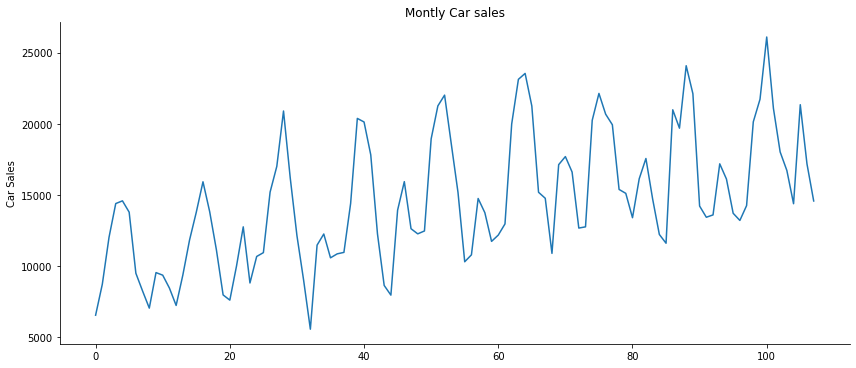

In [ ]:
data.plot(figsize=(12,5))
plt.ylabel('Car Sales')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Montly Car sales')
sns.despine(top=True)
plt.show()

3. Set “Date” column of the dataset as index. Please take the correct name of the column.

In [ ]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.index

DatetimeIndex(['1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01',
               ...
               '1968-03-01', '1968-04-01', '1968-05-01', '1968-06-01',
               '1968-07-01', '1968-08-01', '1968-09-01', '1968-10-01',
               '1968-11-01', '1968-12-01'],
              dtype='datetime64[ns]', name='Month', length=108, freq=None)

4. Try fetching the data using index i.e. for a specific date, specific month and specific year.

In [ ]:
#convert to time series:
ts = data['Sales']
ts.head(10)

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
1960-06-01    13791
1960-07-01     9498
1960-08-01     8251
1960-09-01     7049
1960-10-01     9545
Name: Sales, dtype: int64

In [ ]:
ts['1960-05-01']

14587

5. Plot the boxplot using daily data for daily-total-female-births dataset and monthly data for
monthly-car-sales.csv, monthly-sunspots.csv, daily-total-female-births datasets.

In [ ]:
month_arr = []
year_arr = []
year = 1949
indexCol = []
for i in range(len(data['Sales'])):
  year_arr.append(year)
  indexCol.append(i+1)
  if((i+1)%12>0):
    month_arr.append((i+1)%12)
  else:
    month_arr.append(12)
    year = year + 1

In [ ]:
data['Month_num'] = month_arr
data['Year_num'] = year_arr
data['indexCol'] = indexCol

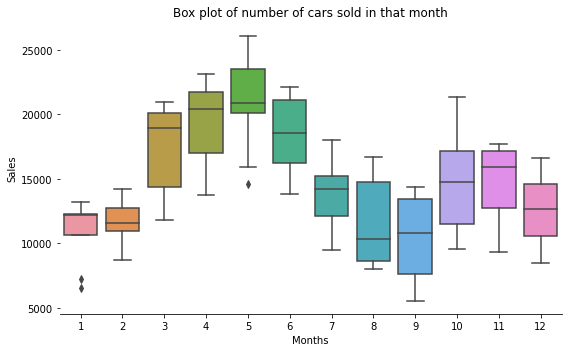

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Month_num", y="Sales", data=data)
plt.xlabel('Months')
plt.title('Box plot of number of cars sold in that month')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_carsales_monthly.pdf', dpi=1400)
plt.show()

6. Plot the boxplot using yearly data for (i) and (ii).

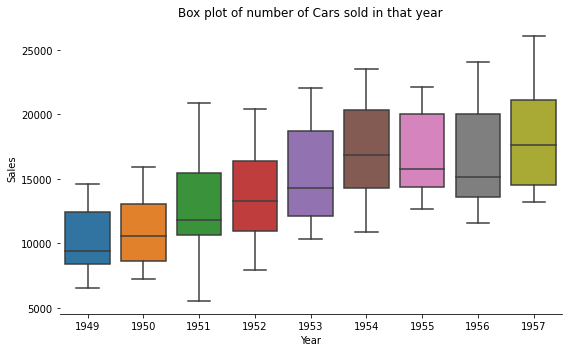

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Year_num", y="Sales", data=data)
plt.xlabel('Year')
plt.title('Box plot of number of Cars sold in that year')
sns.despine(left=True)
plt.tight_layout()
plt.savefig('BoxPlot_carsales_year.pdf', dpi=1400)
plt.show()

7. Calculate moving average of the data and test stationarity (rolling mean, standrad deviation)

In [ ]:
number_of_test = 24

no_of_train = len(data['Sales'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Sales'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Sales'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

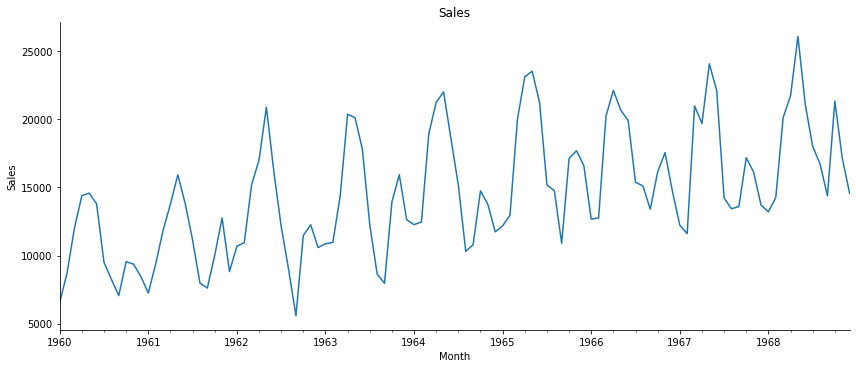

In [ ]:
#checking the stationarity of the data
data['Sales'].plot(figsize=(12,5))
plt.ylabel('Sales')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Sales')
sns.despine(top=True)
plt.show()

In [ ]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

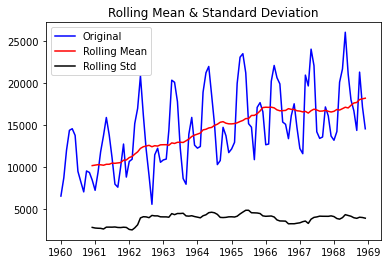

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


In [ ]:
test_stationarity(data['Sales'])

The data is not Sationary as the test stat is > critical value

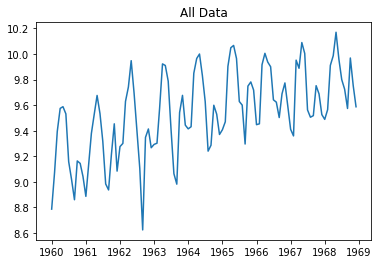

In [ ]:
#removing trend from the data
all_data_log = np.log(data['Sales'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

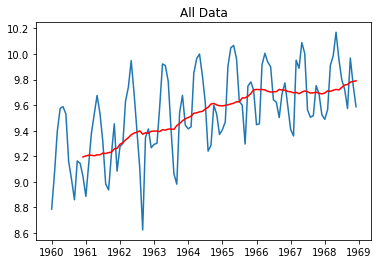

In [ ]:
#Smoothening the data
moving_avg = all_data_log.rolling(window=12).mean()
plt.plot(all_data_log)
plt.title("All Data")
plt.plot(moving_avg,color='red')
plt.show()

In [ ]:
ts_log_moving_avg_diff = all_data_log - moving_avg
print(ts_log_moving_avg_diff)
ts_log_moving_avg_diff.head(24)

Month
1960-01-01         NaN
1960-02-01         NaN
1960-03-01         NaN
1960-04-01         NaN
1960-05-01         NaN
                ...   
1968-08-01   -0.032457
1968-09-01   -0.187685
1968-10-01    0.188763
1968-11-01   -0.033481
1968-12-01   -0.202873
Name: Sales, Length: 108, dtype: float64


Month
1960-01-01         NaN
1960-02-01         NaN
1960-03-01         NaN
1960-04-01         NaN
1960-05-01         NaN
1960-06-01         NaN
1960-07-01         NaN
1960-08-01         NaN
1960-09-01         NaN
1960-10-01         NaN
1960-11-01         NaN
1960-12-01   -0.152304
1961-01-01   -0.316286
1961-02-01   -0.063503
1961-03-01    0.171108
1961-04-01    0.327000
1961-05-01    0.464126
1961-06-01    0.322181
1961-07-01    0.093493
1961-08-01   -0.238172
1961-09-01   -0.291402
1961-10-01   -0.020787
1961-11-01    0.195586
1961-12-01   -0.177557
Name: Sales, dtype: float64

In [ ]:
# remove all NaN fields
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

Month
1960-12-01   -0.152304
1961-01-01   -0.316286
1961-02-01   -0.063503
1961-03-01    0.171108
1961-04-01    0.327000
Name: Sales, dtype: float64

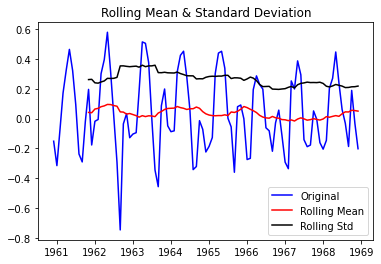

Results of Dickey-Fuller Test:
Test Statistic                 -2.023542
p-value                         0.276347
#Lags Used                     12.000000
Number of Observations Used    84.000000
Critical Value (1%)            -3.510712
Critical Value (5%)            -2.896616
Critical Value (10%)           -2.585482
dtype: float64


In [ ]:
# plot original vs rolling mean vs rolling standard deviation of the difference obtained above
test_stationarity(ts_log_moving_avg_diff)

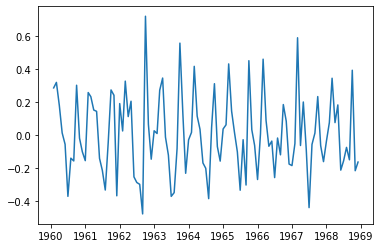

In [ ]:
#Differencing of logarithm of data
ts_log_diff = all_data_log - all_data_log.shift()
plt.plot(ts_log_diff)

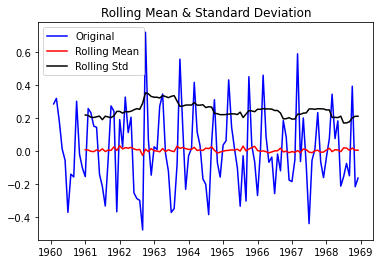

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [ ]:
#remove Nan from obtained differenced series 
# and plot the original versus rolling mean verss rolling standard deviation
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

In [ ]:
#polpulate the index column
no_ALL_Data = len(all_data_log)
print(no_ALL_Data)
indexCol = []
for i in range (no_ALL_Data):
    indexCol.append(i+1)
df_All_Data = pd.DataFrame()
df_All_Data['0'] = indexCol
df_All_Data['W'] = data['Sales'][:no_ALL_Data]

108


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


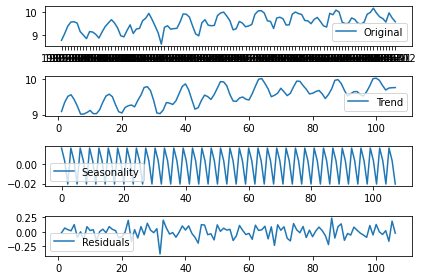

In [ ]:
#Decomposition of logarithm of data into trend, seasonality and residuals


decomposed = seasonal_decompose(np.asarray(all_data_log), freq=3)

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

plt.subplot(411)
plt.plot(all_data_log, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

In [ ]:
# divide the differenced series into train and test
df_train['W_diff'] = ts_log_diff[0:no_of_train]
df_test['W_diff'] = ts_log_diff[no_of_train:]
data['W_diff'] = ts_log_diff

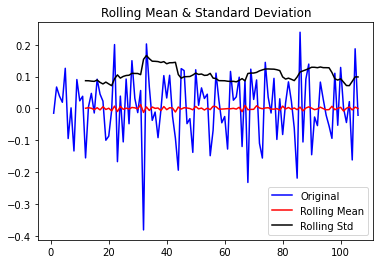

Results of Dickey-Fuller Test:


MissingDataError: ignored

In [ ]:
#Store the residual series and plot it's rolling mean and rolling standard deviation
df_temp = pd.DataFrame()
df_temp['W'] = residual
df_temp['W'].dropna(inplace = True)
ts_log_decompose = df_temp['W']
test_stationarity(ts_log_decompose)

8.Plot autocorrelation and partial autocorrelation and interpret the results of ACF and PACF plots
to find the order of AR, MA, ARMA, ARIMA models

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-car-sales.csv',header=0, index_col=0)

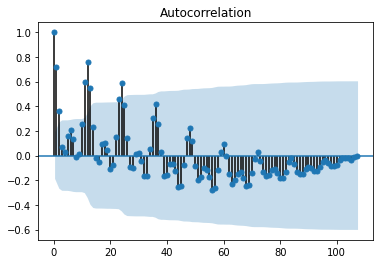

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data, lags=len(data)-1)
plt.show()

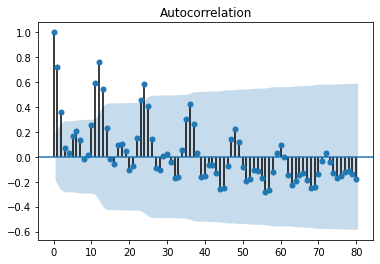

In [ ]:

plot_acf(data, lags=80)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


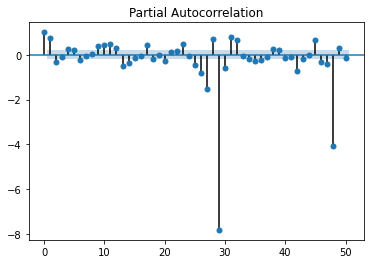

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=50)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


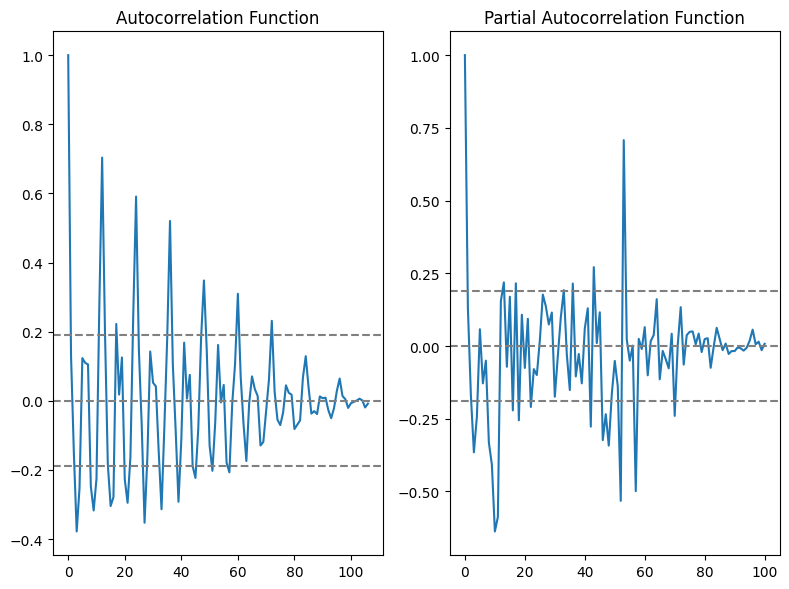

In [ ]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 200)
lag_pacf = pacf(ts_log_diff, nlags = 100, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


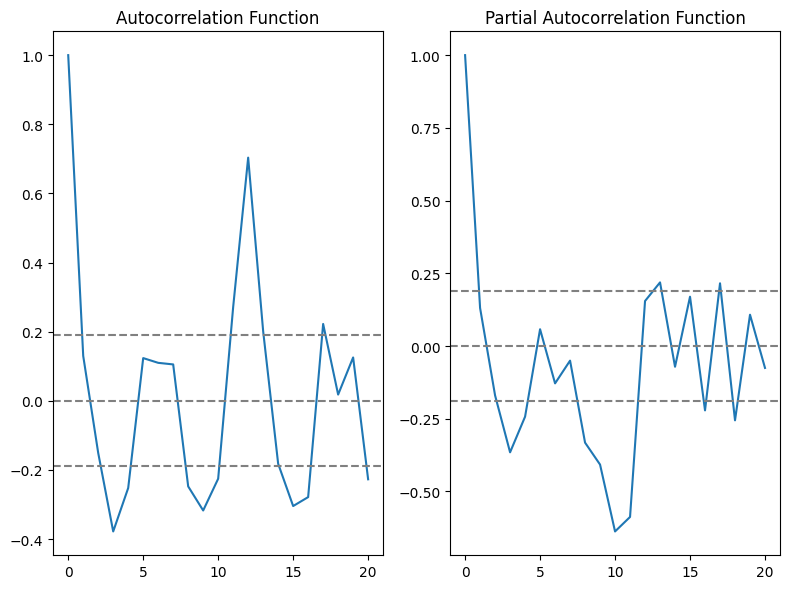

In [ ]:
#ACF and  PACF plots of differenced series
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')


lag_acf = acf(ts_log_diff, nlags = 20)
lag_pacf = pacf(ts_log_diff, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

9. Apply AR,MA,ARMA,ARIMA models. Use the order obtained from correlation wherever
needed.

In [ ]:
#AR


from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=-1, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i][0])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inversed_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inversed_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=14720.935757, expected=12225.000000
counter=2.000000, predicted=12225.868803, expected=11608.000000
counter=3.000000, predicted=11608.906826, expected=20985.000000
counter=4.000000, predicted=20986.419374, expected=19692.000000
counter=5.000000, predicted=19693.072756, expected=24081.000000
counter=6.000000, predicted=24082.234515, expected=22114.000000
counter=7.000000, predicted=22114.986520, expected=14220.000000
counter=8.000000, predicted=14220.769691, expected=13434.000000
counter=9.000000, predicted=13434.863832, expected=13598.000000
counter=10.000000, predicted=13598.922357, expected=17187.000000
counter=11.000000, predicted=17188.150079, expected=16119.000000
counter=12.000000, predicted=16120.014249, expected=13713.000000
counter=13.000000, predicted=13713.926737, expected=13210.000000
counter=14.000000, predicted=13210.933976, expected=14251.000000
counter=15.000000, predicted=14252.012654, expected=20139.000000
counter=16.000000, predicted=20140

Text(0, 0.5, 'W')

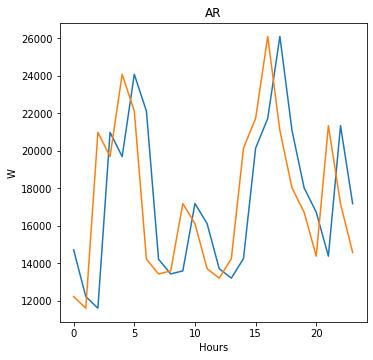

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inversed_pred)
plt.plot(inversed_test)

axarr.set_title('AR')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 17.318976812216356


In [ ]:
#MA

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))

inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:
for k in range(len(inversed_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inversed_pred[k], inversed_test[k]))

error = sqrt(mean_squared_error(inversed_test, inversed_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=14720.935757, expected=12225.000000
counter=2.000000, predicted=12225.868803, expected=11608.000000
counter=3.000000, predicted=11608.906826, expected=20985.000000
counter=4.000000, predicted=20986.419374, expected=19692.000000
counter=5.000000, predicted=19693.072756, expected=24081.000000
counter=6.000000, predicted=24082.234515, expected=22114.000000
counter=7.000000, predicted=22114.986520, expected=14220.000000
counter=8.000000, predicted=14220.769691, expected=13434.000000
counter=9.000000, predicted=13434.863832, expected=13598.000000
counter=10.000000, predicted=13598.922357, expected=17187.000000
counter=11.000000, predicted=17188.150079, expected=16119.000000
counter=12.000000, predicted=16120.014249, expected=13713.000000
counter=13.000000, predicted=13713.926737, expected=13210.000000
counter=14.000000, predicted=13210.933976, expected=14251.000000
counter=15.000000, predicted=14252.012654, expected=20139.000000
counter=16.000000, predicted=20140

Text(0, 0.5, 'W')

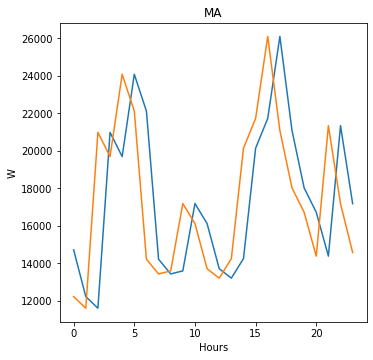

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('MA')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 17.318976812216356


In [ ]:
# ARMA 
size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(2,0,2))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.predict(len(history),len(history))
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse)

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=14720.952519, expected=12225.000000
counter=2.000000, predicted=12225.998667, expected=11608.000000
counter=3.000000, predicted=11609.025883, expected=20985.000000
counter=4.000000, predicted=20986.131194, expected=19692.000000
counter=5.000000, predicted=19692.875561, expected=24081.000000
counter=6.000000, predicted=24082.043188, expected=22114.000000
counter=7.000000, predicted=22114.954902, expected=14220.000000
counter=8.000000, predicted=14220.945955, expected=13434.000000
counter=9.000000, predicted=13435.073457, expected=13598.000000
counter=10.000000, predicted=13599.012060, expected=17187.000000
counter=11.000000, predicted=17188.036343, expected=16119.000000
counter=12.000000, predicted=16119.949416, expected=13713.000000
counter=13.000000, predicted=13713.986106, expected=13210.000000
counter=14.000000, predicted=13211.023927, expected=14251.000000
counter=15.000000, predicted=14252.019214, expected=20139.000000
counter=16.000000, predicted=20140

Text(0, 0.5, 'W')

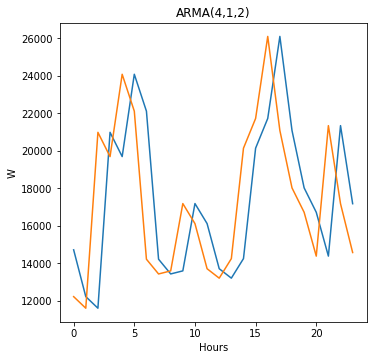

In [ ]:

# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)

axarr.set_title('ARMA(4,1,2)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 17.318976812216356


10. Now, using the minimum AIC or BIC criteria, try to find the optimized order of ARIMA model
and check the accuracy.

In [ ]:
#Optimized ARIMA
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(ts_log_diff, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

0 1 1 15.61347373680853
0 1 2 13.663618265936691
1 1 0 46.62501292292381
2 1 0 46.47548593832582
2 1 2 -26.42336079669633
3 1 0 37.49185672701444
3 1 2 -33.115785342383816


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

4 1 0 15.759221270144224
4 1 2 -9.280097838763936
0 2 1 61.27194168314044


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

1 2 0 111.42525870487508
2 2 0 102.95842955296
3 2 0 98.84482452601645
4 2 0 71.95770394564238


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

In [ ]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - 24)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(ar,d,ma))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='c')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

smallest aic val=-33.000000, ar=3.000000, d=1.000000, ma=2.000000 


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist

In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:
for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=14720.827779, expected=12225.000000
counter=2.000000, predicted=12226.104189, expected=11608.000000
counter=3.000000, predicted=11609.195600, expected=20985.000000
counter=4.000000, predicted=20986.343969, expected=19692.000000
counter=5.000000, predicted=19693.103730, expected=24081.000000
counter=6.000000, predicted=24081.912083, expected=22114.000000
counter=7.000000, predicted=22114.990714, expected=14220.000000
counter=8.000000, predicted=14220.922384, expected=13434.000000
counter=9.000000, predicted=13434.977493, expected=13598.000000
counter=10.000000, predicted=13598.997601, expected=17187.000000
counter=11.000000, predicted=17188.169587, expected=16119.000000
counter=12.000000, predicted=16119.802422, expected=13713.000000
counter=13.000000, predicted=13713.815973, expected=13210.000000
counter=14.000000, predicted=13211.127162, expected=14251.000000
counter=15.000000, predicted=14252.166711, expected=20139.000000
counter=16.000000, predicted=20140

Text(0, 0.5, 'W')

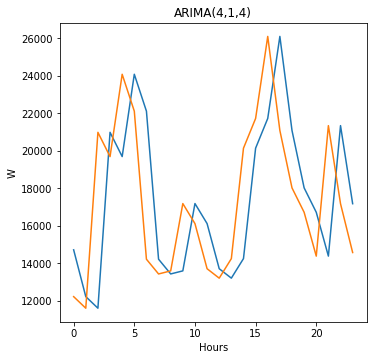

In [ ]:

# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,1,4)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 17.318976812216356


12. Apply Prophet model, calculate the error matrices & plot the original versus predicted.



In [ ]:
data.index

Index(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
       '1960-07', '1960-08', '1960-09', '1960-10',
       ...
       '1968-03', '1968-04', '1968-05', '1968-06', '1968-07', '1968-08',
       '1968-09', '1968-10', '1968-11', '1968-12'],
      dtype='object', name='Month', length=108)

In [ ]:
number_of_test = int(len(data) * 0.2)
no_of_train = len(data['Sales'])-number_of_test
indexCol = []
for k in range(no_of_train):
    indexCol.append(k+1)
df_train = pd.DataFrame()
df_train['indexCol'] = indexCol
df_train['W'] = data['Sales'][:no_of_train]
indexCol = []
data_test= []
for k in range(number_of_test):
    indexCol.append(k+1)
    data_test.append(data['Sales'][no_of_train+k])
df_test = pd.DataFrame()
df_test['indexCol'] = indexCol
df_test['W'] = data_test

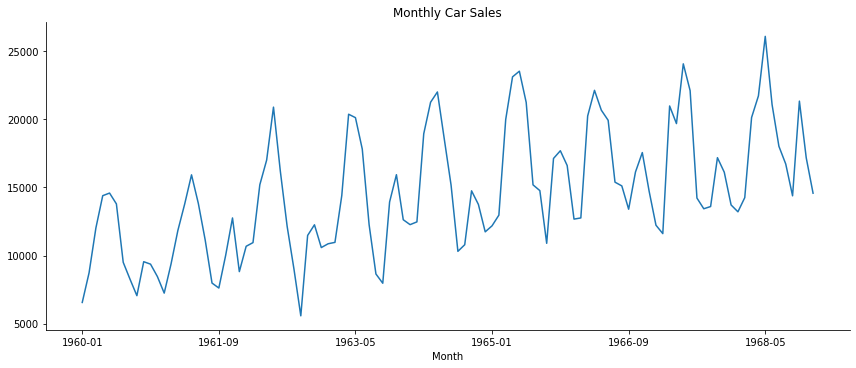

In [ ]:
#Sales PLOT
data['Sales'][0:1440].plot(figsize=(12,5))
#plt.ylabel('Month')
plt.legend().set_visible(False)
plt.tight_layout()
plt.title('Monthly Car Sales')
sns.despine(top=True)
plt.show()

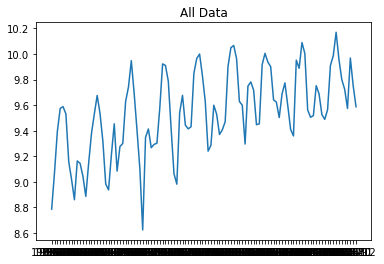

In [ ]:
all_data_log = np.log(data['Sales'])
train_log = np.log(df_train['W'])
test_log = np.log(df_test['W'])
plt.plot(all_data_log)
plt.title("All Data")
plt.show()

In [ ]:
# Optimize ARIMA parameters
aicVal=[]
for d in range(1,5):
    for ari in range(0, 5):
        for maj in range(0,5):
            try:
                arima_obj = ARIMA(ts_log_diff, order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit(maxlag=30, method='css', trend='nc')  
                if(len(aicVal)==0):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                elif(aicVal[len(aicVal)-1][3]>arima_obj_fit.aic):
                    aicVal.append([ari, d, maj, arima_obj_fit.aic])
                
                print(ari, d, maj, arima_obj_fit.aic)
            except ValueError:
                pass

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

0 1 1 15.61347373680853
0 1 2 13.663618265936691
1 1 0 46.62501292292381
2 1 0 46.47548593832582
2 1 2 -26.42336079669633
3 1 0 37.49185672701444
3 1 2 -33.115785342383816


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

4 1 0 15.759221270144224
4 1 2 -9.280097838763936
0 2 1 61.27194168314044
1 2 0 111.42525870487508


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

2 2 0 102.95842955296
3 2 0 98.84482452601645
4 2 0 71.95770394564238


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-

In [ ]:
#ARIMA
listLen=len(aicVal)
ar=int(aicVal[listLen-1][0])
d=int(aicVal[listLen-1][1])
ma=int(aicVal[listLen-1][2])
aic=int(aicVal[listLen-1][3])
print("smallest aic val=%f, ar=%f, d=%f, ma=%f " %(aic, ar, d, ma))

from statsmodels.tsa.arima_model import ARIMA as ARIMAResults

size = int(len(ts_log_diff) - number_of_test)
train, test = ts_log_diff[0:size], ts_log_diff[size:len(ts_log_diff)]
test = test.reset_index(drop = True)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(ar,d,ma))
    model_fit = model.fit(disp=0, maxlag=30, method='css', trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    print("Iteration :",str(t+1))
    history.append(obs)

smallest aic val=-33.000000, ar=3.000000, d=1.000000, ma=2.000000 
Iteration : 1
Iteration : 2


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
Iteration : 17
Iteration : 18
Iteration : 19
Iteration : 20
Iteration : 21


In [ ]:
temp = []
for i in range(len(predictions)):
    temp.append(predictions[i])
predictions_inverse = np.exp(np.array(temp))
start_test_no = len(all_data_log) - len(predictions_inverse) - 1
inverse_test = np.array(np.exp(all_data_log[start_test_no+1:]))
inverse_pred = np.array(np.exp(all_data_log[start_test_no:len(all_data_log)-1])+ predictions_inverse.flatten())

In [ ]:

for k in range(len(inverse_test)):
    print('counter=%f, predicted=%f, expected=%f' % (k+1, inverse_pred[k], inverse_test[k]))

error = sqrt(mean_squared_error(inverse_test, inverse_pred))
print('Test RMSE: %.3f' % error)

counter=1.000000, predicted=20986.148903, expected=19692.000000
counter=2.000000, predicted=19693.041427, expected=24081.000000
counter=3.000000, predicted=24081.868446, expected=22114.000000
counter=4.000000, predicted=22114.876468, expected=14220.000000
counter=5.000000, predicted=14220.900899, expected=13434.000000
counter=6.000000, predicted=13435.010902, expected=13598.000000
counter=7.000000, predicted=13599.158690, expected=17187.000000
counter=8.000000, predicted=17188.132006, expected=16119.000000
counter=9.000000, predicted=16120.093412, expected=13713.000000
counter=10.000000, predicted=13714.058045, expected=13210.000000
counter=11.000000, predicted=13211.116771, expected=14251.000000
counter=12.000000, predicted=14252.159655, expected=20139.000000
counter=13.000000, predicted=20140.095650, expected=21725.000000
counter=14.000000, predicted=21725.994379, expected=26099.000000
counter=15.000000, predicted=26099.874270, expected=21084.000000
counter=16.000000, predicted=21084

Text(0, 0.5, 'W')

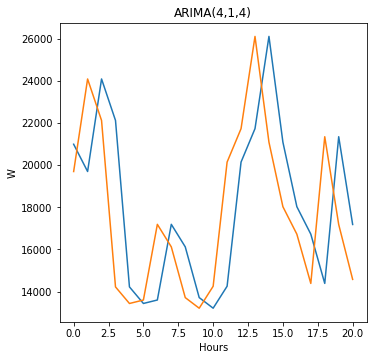

In [ ]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

plt.plot(inverse_pred)
plt.plot(inverse_test)
axarr.set_title('ARIMA(4,1,4)')
plt.xlabel('Hours')
plt.ylabel('W')

In [ ]:
MAPE = np.mean(np.abs((inversed_test - inversed_pred) / inversed_test)) * 100
print('MAPE %',MAPE)

MAPE % 17.318976812216356


12. Apply Prophet model, calculate the error matrices & plot the original versus predicted.

In [ ]:

from fbprophet import Prophet
# https://facebook.github.io/prophet/docs/quick_start.html


import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html


from scipy import stats
# https://docs.scipy.org/doc/scipy/reference/

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-car-sales.csv')

In [ ]:
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

In [ ]:
data = data.rename(columns={'Month':'ds', 'Sales':'y'})

data.head(5)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


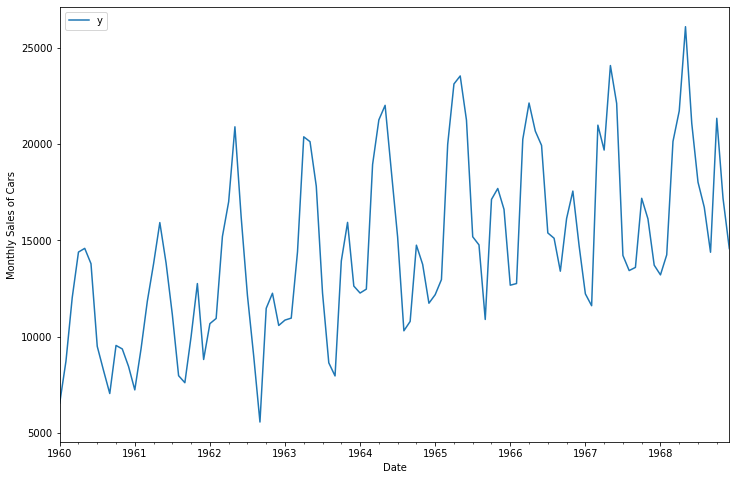

In [ ]:

ax = data.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Sales of Cars')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
trainLen = 72
train = data[:trainLen]
test = data[trainLen:]

In [ ]:
my_model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
103,1968-08-01
104,1968-09-01
105,1968-10-01
106,1968-11-01
107,1968-12-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
103,1968-08-01,17927.547997,16074.047413,19679.373699
104,1968-09-01,16961.137085,15050.925590,18869.210544
105,1968-10-01,20447.178530,18556.494694,22327.738593
106,1968-11-01,20581.795086,18719.057336,22481.284918
107,1968-12-01,19137.605366,17320.806365,21057.431497


In [ ]:
predicted = forecast['yhat'][72:]

In [ ]:
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 3108.936


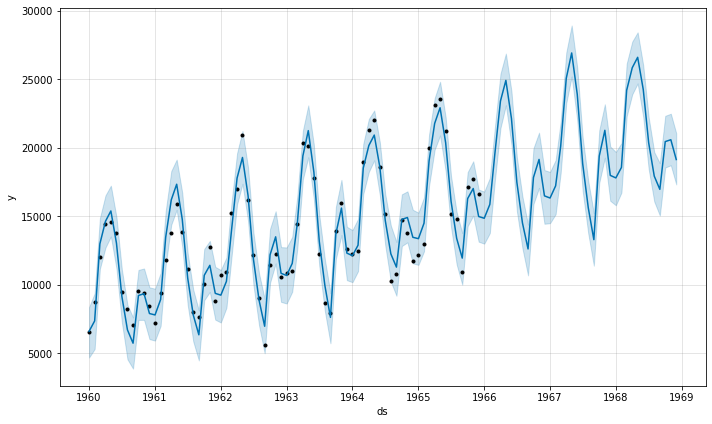

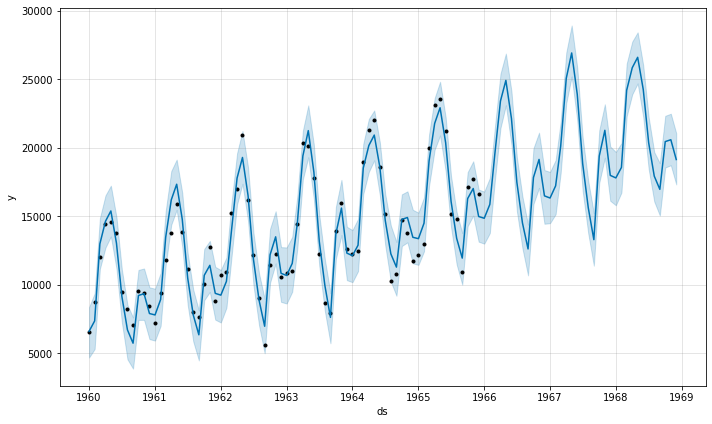

In [ ]:

my_model.plot(forecast, uncertainty=True)

In [ ]:
MAPE = np.mean(np.abs((test['y']- predicted) / test['y'])) * 100
print('MAPE %',MAPE)

KeyError: ignored

13. Apply LSTM (Vanilla, stack, bidirectional) model, calculate the error matrices & plot the
original versus predicted.

In [ ]:
# https://keras.io/api/
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from numpy import array

import pandas as pd
# https://pandas.pydata.org/docs/

import numpy as np
# https://numpy.org/doc/stable/about.html

from math import sqrt
# https://docs.python.org/3/library/math.html
from datetime import datetime
# https://docs.python.org/3/library/datetime.html

from matplotlib import pyplot as plt
# https://matplotlib.org/index.html
import seaborn as sns
# https://seaborn.pydata.org/

from sklearn.metrics import mean_squared_error
# https://scikit-learn.org/stable/getting_started.html

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/nrjcs/iitpbse/master/monthly-car-sales.csv')

In [ ]:
data.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.dtypes

Month    datetime64[ns]
Sales             int64
dtype: object

VANILA LSTM

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
raw_seq = data['Sales']
trainLen = 87
train = raw_seq[:trainLen]
test = raw_seq[trainLen:]

In [ ]:

trainLen

87

In [ ]:
n_steps = 3

In [ ]:
X, y = split_sequence(train, n_steps)

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


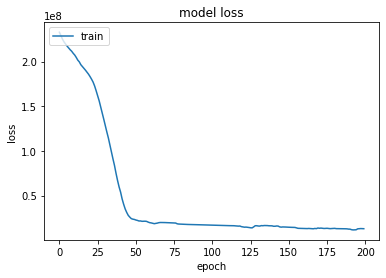

In [ ]:

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test = test.reset_index(drop = True)

In [ ]:
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 3852.326


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %',MAPE)

MAPE % 21.50153777181351


Stacked LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# fit model
history= model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


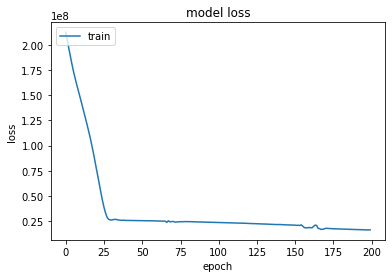

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 4235.025


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %',MAPE)

MAPE % 22.665736469486255


Bidirectional LSTM

In [ ]:
from keras.layers import Bidirectional

In [ ]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(X, y, epochs=200, verbose=0)

dict_keys(['loss'])


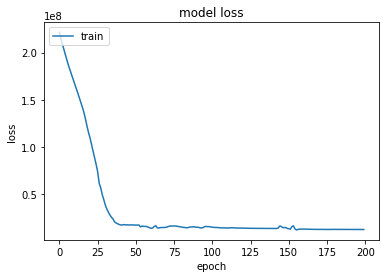

In [ ]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_test, y_test = split_sequence(test, n_steps)
X_test = np.array(X_test).reshape((-1, n_steps, n_features))
yhat = model.predict(X_test, verbose=0)

In [ ]:
error = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % error)

Test RMSE: 4024.617


In [ ]:
MAPE = np.mean(np.abs((y_test - yhat) / y_test)) * 100
print('MAPE %',MAPE)

MAPE % 23.988006572482053
